<a href="https://colab.research.google.com/github/VirunaVidaswin/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preprocessing

1. Loading and Viewing the Dataset

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

df = pd.read_csv('/content/bank-full.csv', sep=';')
print(f"\nTotal Rows: {df.shape[0]}")
print(f"Total Cols: {df.shape[1]}")
print("\nDataset Head:")
print(df.head())




Total Rows: 45211
Total Cols: 17

Dataset Head:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


2. Finding all the categorical features, data values




In [2]:
for column in df.select_dtypes('object'):
    print(f"\nColumn: {column} , "+f" Values: {df[column].unique()}")


Column: job ,  Values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital ,  Values: ['married' 'single' 'divorced']

Column: education ,  Values: ['tertiary' 'secondary' 'unknown' 'primary']

Column: default ,  Values: ['no' 'yes']

Column: housing ,  Values: ['yes' 'no']

Column: loan ,  Values: ['no' 'yes']

Column: contact ,  Values: ['unknown' 'cellular' 'telephone']

Column: month ,  Values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome ,  Values: ['unknown' 'failure' 'other' 'success']

Column: y ,  Values: ['no' 'yes']


2.1 Plotting the individual distribution of each categorical feature

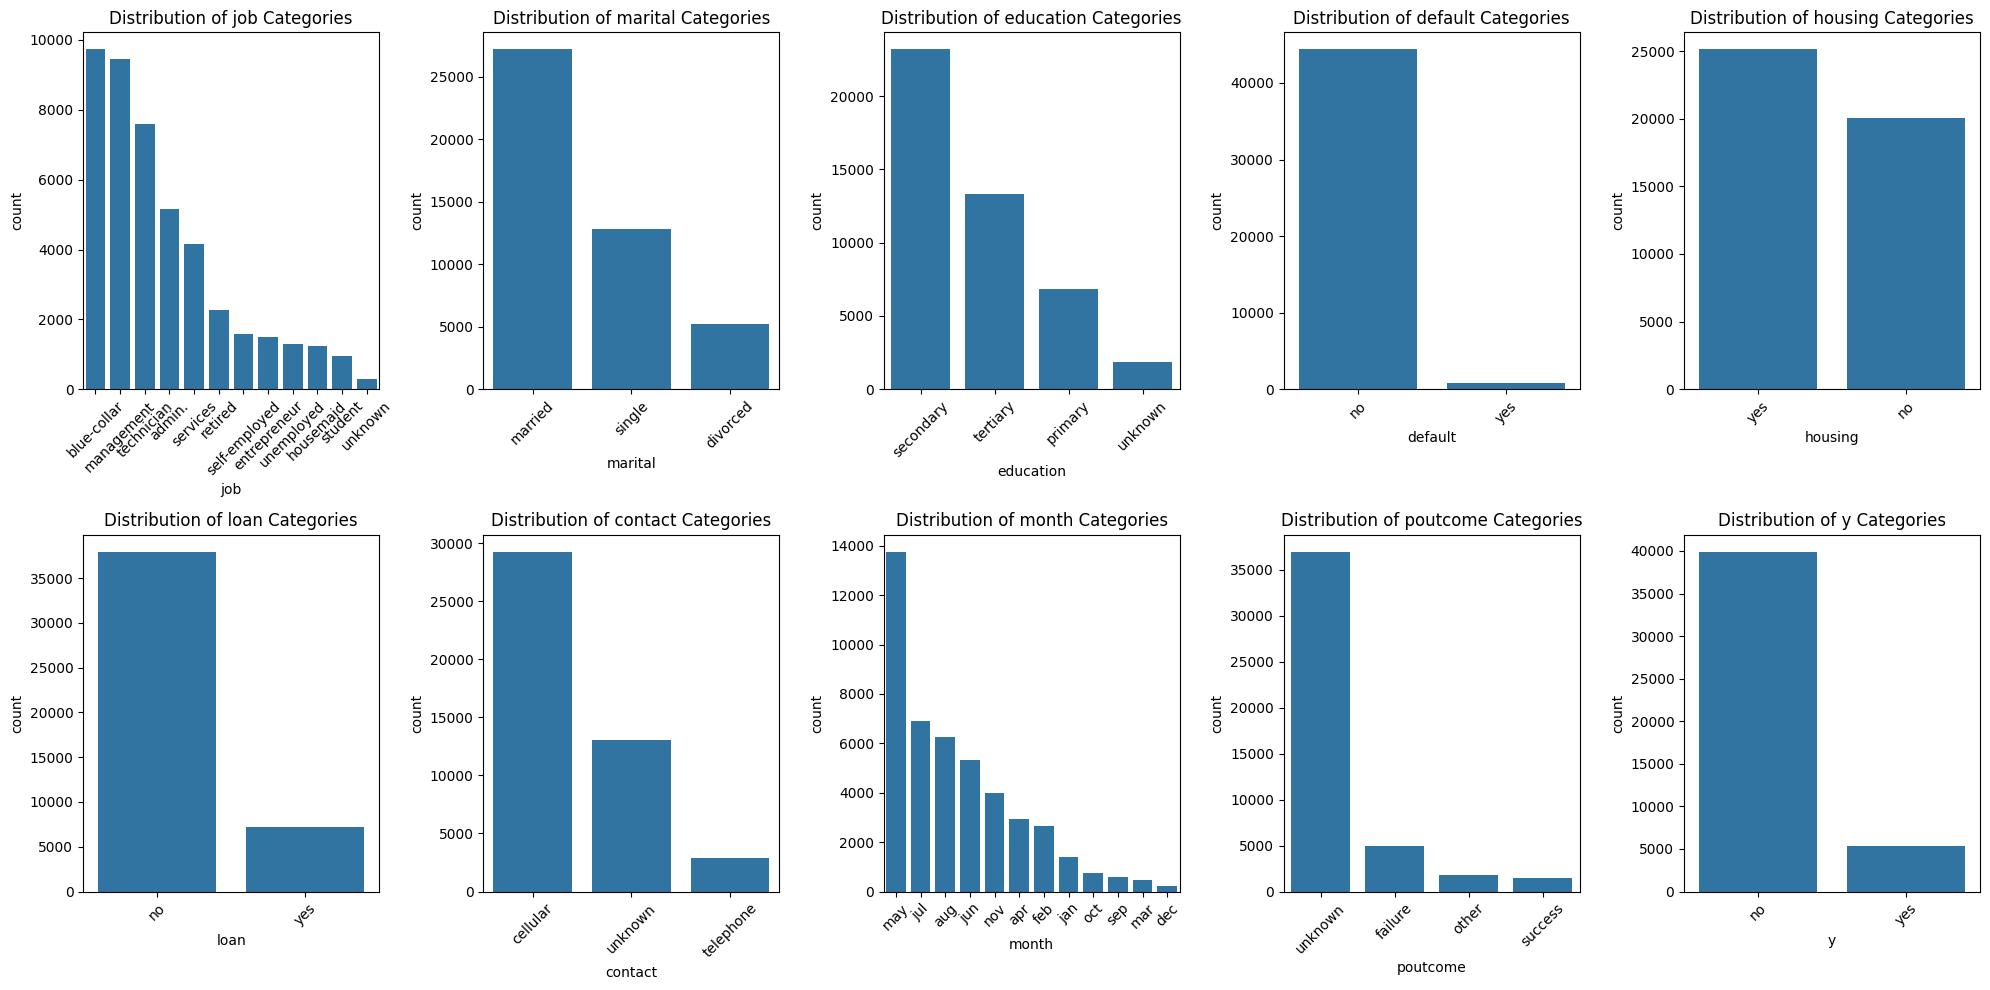

In [3]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'poutcome', 'y']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten() # to make@d arr to 1D

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} Categories')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

3. Finding all the numerical featuers  

In [4]:
num_features = df.select_dtypes(include=[np.number])
print(num_features.head())


   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0


3.1 Plotting the individual distribution of each numerical feature

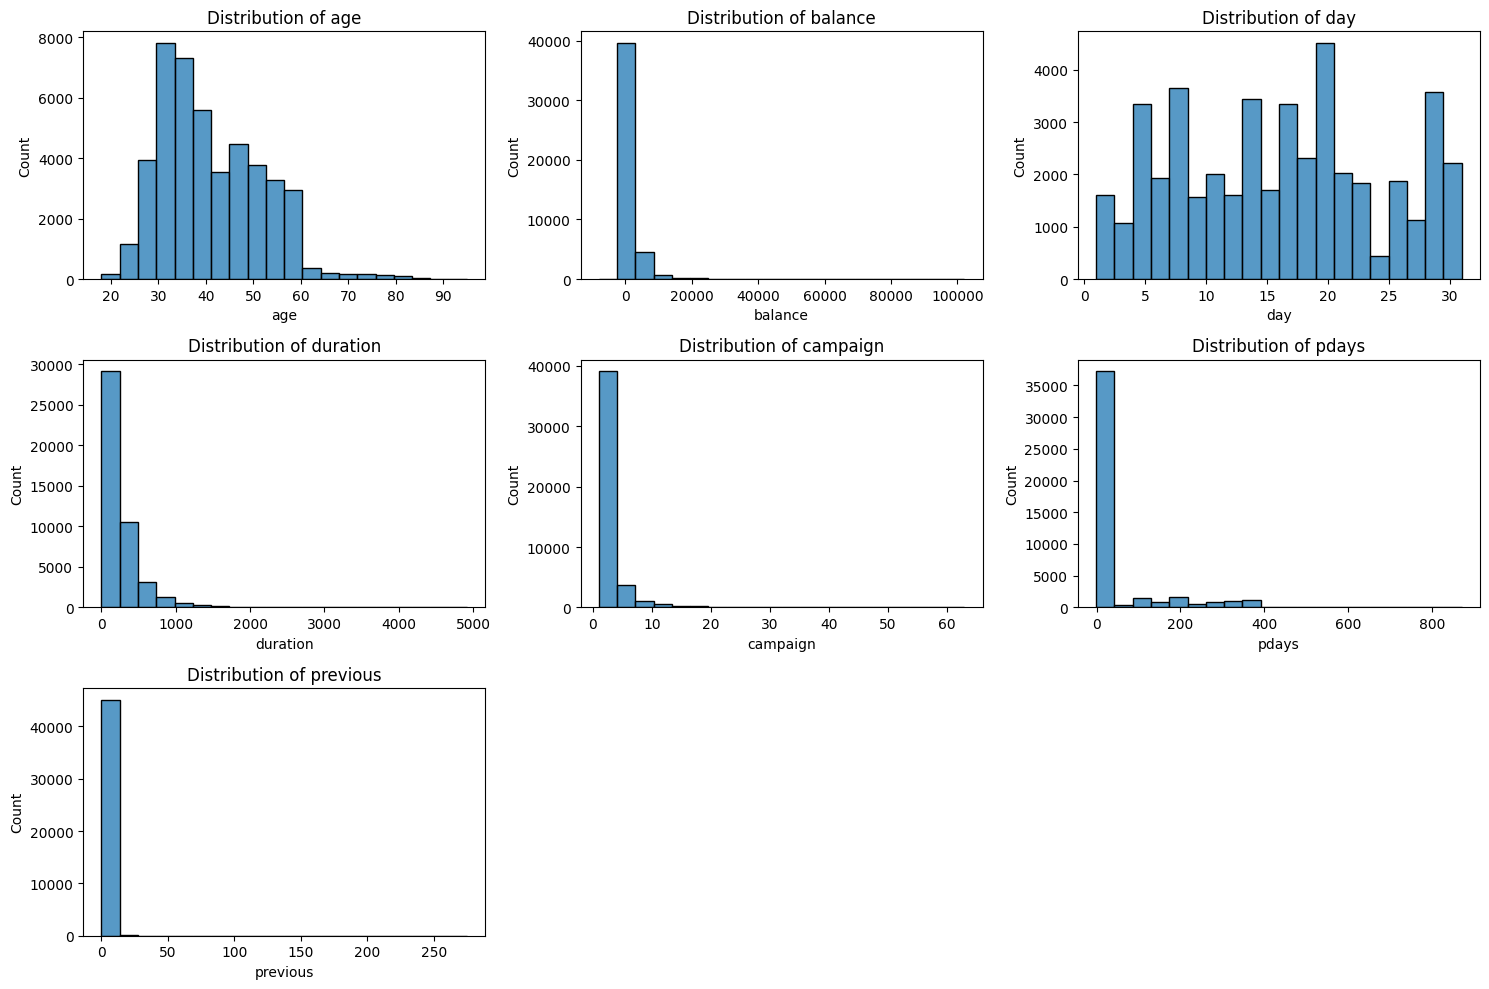

In [5]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], bins=20)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

4. Finding any missing values

In [6]:
missing_values = df.isnull().sum()
print(missing_values)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


5. Checking for duplicate rows

In [7]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


6. Checking for data imbalancing

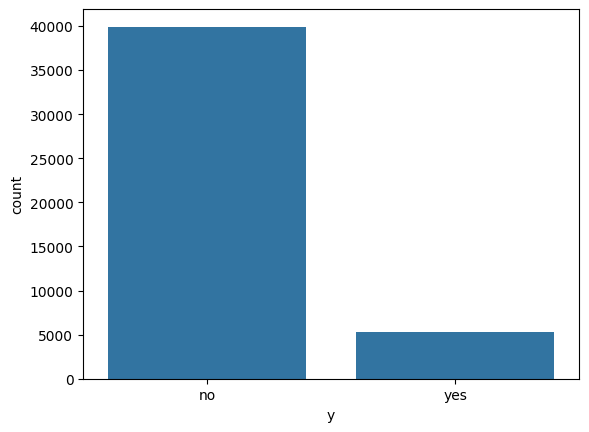

In [27]:
sns.countplot(x='y', data=df)
plt.show()

# 2. Feature Training

1.Removing features with outliers


In [9]:
df2 = df.copy()
grouped = df2.groupby(['y', 'default']).size()
percentage = grouped / len(df2) * 100
print(percentage)
df2 = df2.drop(columns=['default'])
# Default droppped as over 90% has value no

y    default
no   no         86.613877
     yes         1.687642
yes  no         11.583464
     yes         0.115016
dtype: float64


In [10]:
print(df2.groupby(['y', 'pdays']).size())
df2 = df2.drop(columns=['pdays'])
# pdays droped due to data imbalanced

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64


In [11]:
print(df2.groupby(['y', 'balance']).size())
# People with higher balance are interested in the deposit not dropped

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Length: 9258, dtype: int64


In [12]:
print(df2.groupby(['y', 'age']).size())
# not dropped as outliers are meaninful

y    age
no   18      5
     19     24
     20     35
     21     57
     22     89
            ..
yes  87      3
     90      2
     92      2
     93      2
     95      1
Length: 148, dtype: int64


In [13]:
cat_cols= ['job', 'marital', 'education','contact', 'month', 'poutcome']
df2 = pd.get_dummies(df2, columns=cat_cols)

bool_cols = ['housing', 'loan', 'y']
for col in bool_cols:
    df2[col] = df2[col].apply(lambda x: 1 if x == 'yes' else 0)

df2 = df2.astype(int)
print(df2.head())

   age  balance  housing  loan  day  duration  campaign  previous  y  \
0   58     2143        1     0    5       261         1         0  0   
1   44       29        1     0    5       151         1         0  0   
2   33        2        1     1    5        76         1         0  0   
3   47     1506        1     0    5        92         1         0  0   
4   33        1        0     0    5       198         1         0  0   

   job_admin.  ...  month_jun  month_mar  month_may  month_nov  month_oct  \
0           0  ...          0          0          1          0          0   
1           0  ...          0          0          1          0          0   
2           0  ...          0          0          1          0          0   
3           0  ...          0          0          1          0          0   
4           0  ...          0          0          1          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0      

# 3. Test and Train

In [99]:
X = df2.drop(columns=['y'])
y = df2['y']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [100]:
len(X_train)

8462

In [101]:
len(X_test)

2116

1 Random Forest

In [102]:
# Random Forest Model
print("\n--- Random Forest Classifier ---\n")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Random Forest Predictions
rf_predictions = rf_model.predict(X_test)

# Random Forest Evaluation
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))



--- Random Forest Classifier ---

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1092
           1       0.80      0.89      0.84      1024

    accuracy                           0.84      2116
   macro avg       0.84      0.84      0.84      2116
weighted avg       0.84      0.84      0.84      2116

Confusion Matrix:
[[865 227]
 [115 909]]


2. Neural Network

In [111]:
# Building the model
nn_model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compiling the model
optimizer = Adam(learning_rate=0.001)
nn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Nn = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5894 - loss: 0.6853 - val_accuracy: 0.8027 - val_loss: 0.4700
Epoch 2/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7615 - loss: 0.5084 - val_accuracy: 0.8293 - val_loss: 0.4020
Epoch 3/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7923 - loss: 0.4553 - val_accuracy: 0.8423 - val_loss: 0.3820
Epoch 4/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8197 - loss: 0.4113 - val_accuracy: 0.8506 - val_loss: 0.3708
Epoch 5/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8351 - loss: 0.4015 - val_accuracy: 0.8523 - val_loss: 0.3643
Epoch 6/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8320 - loss: 0.3930 - val_accuracy: 0.8506 - val_loss: 0.3597
Epoch 7/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8344 - loss: 0.3918 - val_accuracy: 0.8512 - val_loss: 0.3562
Epoch 8/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8436 - loss: 0.3795 - val_accu

In [112]:


# Prediction
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)

# Evaluation
print("Neural Network Classifier Report:\n")
print(classification_report(y_test, y_pred_nn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Classifier Report:

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1092
           1       0.80      0.90      0.85      1024

    accuracy                           0.85      2116
   macro avg       0.85      0.85      0.85      2116
weighted avg       0.85      0.85      0.85      2116

Confusion Matrix:
[[866 226]
 [ 98 926]]


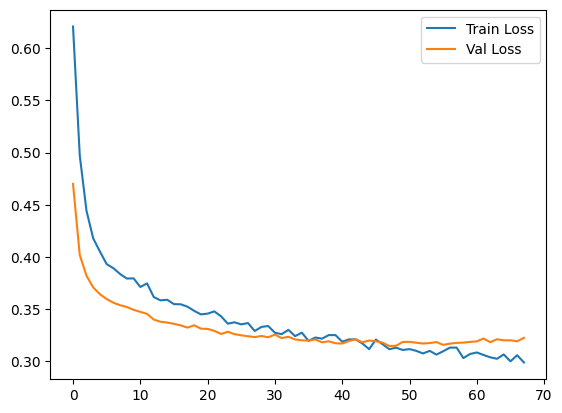

In [113]:
plt.plot(Nn.history['loss'], label='Train Loss')
plt.plot(Nn.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


In [71]:
# Model Comparison
print(f"Random Forest Accuracy: {rf_model.score(X_test, y_test):.4f}")
print(f"Neural Network Accuracy: {nn_model.evaluate(X_test, y_test, verbose=0)[1]:.4f}")


Random Forest Accuracy: 0.8384
Neural Network Accuracy: 0.8502
